*In this notebook we are reading our dataset with technical indicators and fitting the CatBoost model*

In [1]:
import numpy as np
import pandas as pd

from catboost import CatBoostClassifier, Pool, CatBoostRegressor
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [2]:
# initialize data
cryptoset = pd.read_csv('data/cryptoset_with_indicators.csv', delimiter=';', on_bad_lines='skip')
categorical_names = ['news_title', 'source']
features_names = cryptoset.columns.values[6:]
target_names = ['high', 'low']
features_names = np.append(categorical_names, features_names)
print('Features:', features_names)
print('Target:', target_names)

Features: ['news_title' 'source' 'pos_votes' 'neg_votes' 'imp_votes' 'com_votes'
 'like_votes' 'dislike_votes' 'lol_votes' 'save_votes' 'first_AAVE'
 'first_ADA' 'first_ALGO' 'first_AMP' 'first_ANC' 'first_APE' 'first_AR'
 'first_ATOM' 'first_AVAX' 'first_AXS' 'first_BAT' 'first_BCH'
 'first_BCHABC' 'first_BIT' 'first_BNB' 'first_BTC' 'first_BTT'
 'first_BUSD' 'first_CAKE' 'first_CEL' 'first_CELO' 'first_CHZ'
 'first_COMP' 'first_CRO' 'first_CVX' 'first_CVXCRV' 'first_DAI'
 'first_DCR' 'first_DFI' 'first_DOGE' 'first_DOT' 'first_EGLD' 'first_ENJ'
 'first_EOS' 'first_ERD' 'first_ETC' 'first_ETH' 'first_EXRD' 'first_FIL'
 'first_FLOW' 'first_FRAX' 'first_FTM' 'first_FTT' 'first_FXS'
 'first_GALA' 'first_GMT' 'first_GNO' 'first_GNT' 'first_GRT' 'first_GST'
 'first_GT' 'first_HBAR' 'first_HEART' 'first_HNT' 'first_HOT' 'first_HT'
 'first_ICP' 'first_ION' 'first_JEWEL' 'first_JUNO' 'first_KCS'
 'first_KDA' 'first_KLAY' 'first_KMD' 'first_KSM' 'first_LEND' 'first_LEO'
 'first_LINK' 'first_LR

In [3]:
X = cryptoset[features_names].drop(columns=target_names)
y1, y2 = cryptoset['low'], cryptoset['high']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, train_size=0.70, random_state=42)

In [5]:
# set up the model
catboost_model = CatBoostRegressor(n_estimators=1000,
                                   loss_function = 'RMSE',
                                   eval_metric = 'RMSE',
                                   max_depth=8,
                                   random_state=42,
                                   cat_features = categorical_names)
# fit model
catboost_model.fit(X_train, y_train, 
                   eval_set = (X_test, y_test),
                   use_best_model = True,
                   plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.070738
0:	learn: 2313.7780446	test: 2320.6613684	best: 2320.6613684 (0)	total: 254ms	remaining: 4m 14s
1:	learn: 2154.6689773	test: 2160.8227451	best: 2160.8227451 (1)	total: 346ms	remaining: 2m 52s
2:	learn: 2006.4201802	test: 2011.8064849	best: 2011.8064849 (2)	total: 448ms	remaining: 2m 28s
3:	learn: 1869.5876329	test: 1874.5142386	best: 1874.5142386 (3)	total: 523ms	remaining: 2m 10s
4:	learn: 1741.7325235	test: 1746.0900513	best: 1746.0900513 (4)	total: 632ms	remaining: 2m 5s
5:	learn: 1622.0657428	test: 1625.6680574	best: 1625.6680574 (5)	total: 710ms	remaining: 1m 57s
6:	learn: 1510.2978612	test: 1513.2440090	best: 1513.2440090 (6)	total: 810ms	remaining: 1m 54s
7:	learn: 1406.6597363	test: 1409.0873915	best: 1409.0873915 (7)	total: 903ms	remaining: 1m 51s
8:	learn: 1311.4967859	test: 1313.7548570	best: 1313.7548570 (8)	total: 1s	remaining: 1m 50s
9:	learn: 1220.9034300	test: 1222.6955377	best: 1222.6955377 (9)	total: 1.09s	remaining: 1m 48s
10:	learn: 113

89:	learn: 22.9016033	test: 25.2465332	best: 25.2465332 (89)	total: 8.05s	remaining: 1m 21s
90:	learn: 22.5899878	test: 24.9745370	best: 24.9745370 (90)	total: 8.14s	remaining: 1m 21s
91:	learn: 22.2369014	test: 24.6476869	best: 24.6476869 (91)	total: 8.21s	remaining: 1m 21s
92:	learn: 21.9889621	test: 24.4310861	best: 24.4310861 (92)	total: 8.29s	remaining: 1m 20s
93:	learn: 21.6994627	test: 24.1986752	best: 24.1986752 (93)	total: 8.36s	remaining: 1m 20s
94:	learn: 21.4163228	test: 23.9700142	best: 23.9700142 (94)	total: 8.44s	remaining: 1m 20s
95:	learn: 21.1367969	test: 23.7601247	best: 23.7601247 (95)	total: 8.54s	remaining: 1m 20s
96:	learn: 20.8197620	test: 23.5183033	best: 23.5183033 (96)	total: 8.62s	remaining: 1m 20s
97:	learn: 20.6004598	test: 23.3506146	best: 23.3506146 (97)	total: 8.69s	remaining: 1m 19s
98:	learn: 20.3446944	test: 23.1984881	best: 23.1984881 (98)	total: 8.77s	remaining: 1m 19s
99:	learn: 20.1300695	test: 23.0970367	best: 23.0970367 (99)	total: 8.84s	remain

178:	learn: 12.3461628	test: 16.6949202	best: 16.6943178 (177)	total: 15.4s	remaining: 1m 10s
179:	learn: 12.3406619	test: 16.6950870	best: 16.6943178 (177)	total: 15.5s	remaining: 1m 10s
180:	learn: 12.3353608	test: 16.6924624	best: 16.6924624 (180)	total: 15.6s	remaining: 1m 10s
181:	learn: 12.1903990	test: 16.5875308	best: 16.5875308 (181)	total: 15.8s	remaining: 1m 10s
182:	learn: 12.1051021	test: 16.5344318	best: 16.5344318 (182)	total: 15.9s	remaining: 1m 10s
183:	learn: 12.0984197	test: 16.5280553	best: 16.5280553 (183)	total: 16s	remaining: 1m 10s
184:	learn: 12.0530352	test: 16.5245061	best: 16.5245061 (184)	total: 16.1s	remaining: 1m 10s
185:	learn: 11.9548941	test: 16.4307155	best: 16.4307155 (185)	total: 16.1s	remaining: 1m 10s
186:	learn: 11.9479012	test: 16.4256517	best: 16.4256517 (186)	total: 16.2s	remaining: 1m 10s
187:	learn: 11.9433042	test: 16.4267844	best: 16.4256517 (186)	total: 16.5s	remaining: 1m 11s
188:	learn: 11.7969371	test: 16.3143808	best: 16.3143808 (188)

266:	learn: 8.5249059	test: 14.1729272	best: 14.1729272 (266)	total: 25.4s	remaining: 1m 9s
267:	learn: 8.5057550	test: 14.1723500	best: 14.1723500 (267)	total: 25.5s	remaining: 1m 9s
268:	learn: 8.4461594	test: 14.1310600	best: 14.1310600 (268)	total: 25.6s	remaining: 1m 9s
269:	learn: 8.4155589	test: 14.1205703	best: 14.1205703 (269)	total: 25.7s	remaining: 1m 9s
270:	learn: 8.3794149	test: 14.0957659	best: 14.0957659 (270)	total: 25.8s	remaining: 1m 9s
271:	learn: 8.3213965	test: 14.0711884	best: 14.0711884 (271)	total: 25.8s	remaining: 1m 9s
272:	learn: 8.2741079	test: 14.0444863	best: 14.0444863 (272)	total: 25.9s	remaining: 1m 8s
273:	learn: 8.2638021	test: 14.0428534	best: 14.0428534 (273)	total: 26s	remaining: 1m 8s
274:	learn: 8.2346307	test: 14.0256423	best: 14.0256423 (274)	total: 26s	remaining: 1m 8s
275:	learn: 8.2180625	test: 14.0257202	best: 14.0256423 (274)	total: 26.1s	remaining: 1m 8s
276:	learn: 8.1685573	test: 13.9949745	best: 13.9949745 (276)	total: 26.2s	remaining

357:	learn: 6.2741338	test: 13.0203017	best: 13.0203017 (357)	total: 32s	remaining: 57.3s
358:	learn: 6.2690282	test: 13.0194905	best: 13.0194905 (358)	total: 32s	remaining: 57.2s
359:	learn: 6.2588590	test: 13.0132300	best: 13.0132300 (359)	total: 32.1s	remaining: 57.1s
360:	learn: 6.2570581	test: 13.0108097	best: 13.0108097 (360)	total: 32.2s	remaining: 57s
361:	learn: 6.2345008	test: 13.0019171	best: 13.0019171 (361)	total: 32.3s	remaining: 56.9s
362:	learn: 6.2276171	test: 13.0047126	best: 13.0019171 (361)	total: 32.3s	remaining: 56.8s
363:	learn: 6.2229571	test: 13.0026503	best: 13.0019171 (361)	total: 32.4s	remaining: 56.6s
364:	learn: 6.2199660	test: 13.0024431	best: 13.0019171 (361)	total: 32.5s	remaining: 56.5s
365:	learn: 6.2019665	test: 12.9979231	best: 12.9979231 (365)	total: 32.6s	remaining: 56.5s
366:	learn: 6.1990136	test: 12.9903034	best: 12.9903034 (366)	total: 32.7s	remaining: 56.3s
367:	learn: 6.1884453	test: 12.9887643	best: 12.9887643 (367)	total: 32.7s	remaining: 

449:	learn: 5.0868574	test: 12.5278768	best: 12.5269819 (448)	total: 39.3s	remaining: 48s
450:	learn: 5.0755234	test: 12.5239408	best: 12.5239408 (450)	total: 39.4s	remaining: 47.9s
451:	learn: 5.0741664	test: 12.5225237	best: 12.5225237 (451)	total: 39.5s	remaining: 47.8s
452:	learn: 5.0656818	test: 12.5227102	best: 12.5225237 (451)	total: 39.5s	remaining: 47.7s
453:	learn: 5.0554047	test: 12.5198794	best: 12.5198794 (453)	total: 39.6s	remaining: 47.7s
454:	learn: 5.0441559	test: 12.5117135	best: 12.5117135 (454)	total: 39.7s	remaining: 47.6s
455:	learn: 5.0228440	test: 12.5023413	best: 12.5023413 (455)	total: 39.8s	remaining: 47.5s
456:	learn: 5.0128241	test: 12.4976050	best: 12.4976050 (456)	total: 39.9s	remaining: 47.4s
457:	learn: 5.0103366	test: 12.4940550	best: 12.4940550 (457)	total: 40s	remaining: 47.3s
458:	learn: 4.9974091	test: 12.4942130	best: 12.4940550 (457)	total: 40s	remaining: 47.2s
459:	learn: 4.9888390	test: 12.4871314	best: 12.4871314 (459)	total: 40.1s	remaining: 

540:	learn: 4.3034883	test: 12.2224958	best: 12.2224958 (540)	total: 46.1s	remaining: 39.1s
541:	learn: 4.3027943	test: 12.2217322	best: 12.2217322 (541)	total: 46.2s	remaining: 39.1s
542:	learn: 4.2939162	test: 12.2218737	best: 12.2217322 (541)	total: 46.3s	remaining: 39s
543:	learn: 4.2931061	test: 12.2216403	best: 12.2216403 (543)	total: 46.4s	remaining: 38.9s
544:	learn: 4.2783852	test: 12.2110176	best: 12.2110176 (544)	total: 46.5s	remaining: 38.8s
545:	learn: 4.2752272	test: 12.2098585	best: 12.2098585 (545)	total: 46.5s	remaining: 38.7s
546:	learn: 4.2704859	test: 12.2089626	best: 12.2089626 (546)	total: 46.6s	remaining: 38.6s
547:	learn: 4.2625515	test: 12.2065661	best: 12.2065661 (547)	total: 46.7s	remaining: 38.5s
548:	learn: 4.2576114	test: 12.2035024	best: 12.2035024 (548)	total: 46.7s	remaining: 38.4s
549:	learn: 4.2508677	test: 12.2011075	best: 12.2011075 (549)	total: 46.8s	remaining: 38.3s
550:	learn: 4.2485483	test: 12.2022444	best: 12.2011075 (549)	total: 46.9s	remaini

631:	learn: 3.7754843	test: 12.0417346	best: 12.0417346 (631)	total: 55.6s	remaining: 32.4s
632:	learn: 3.7689840	test: 12.0378299	best: 12.0378299 (632)	total: 55.7s	remaining: 32.3s
633:	learn: 3.7673065	test: 12.0375340	best: 12.0375340 (633)	total: 55.8s	remaining: 32.2s
634:	learn: 3.7665128	test: 12.0374851	best: 12.0374851 (634)	total: 55.9s	remaining: 32.1s
635:	learn: 3.7620703	test: 12.0371680	best: 12.0371680 (635)	total: 56s	remaining: 32s
636:	learn: 3.7549067	test: 12.0363468	best: 12.0363468 (636)	total: 56.1s	remaining: 31.9s
637:	learn: 3.7490451	test: 12.0360472	best: 12.0360472 (637)	total: 56.1s	remaining: 31.9s
638:	learn: 3.7431419	test: 12.0346008	best: 12.0346008 (638)	total: 56.2s	remaining: 31.8s
639:	learn: 3.7322731	test: 12.0327136	best: 12.0327136 (639)	total: 56.3s	remaining: 31.7s
640:	learn: 3.7285123	test: 12.0332932	best: 12.0327136 (639)	total: 56.4s	remaining: 31.6s
641:	learn: 3.7281476	test: 12.0336788	best: 12.0327136 (639)	total: 56.4s	remaining

721:	learn: 3.3203579	test: 11.9242127	best: 11.9242127 (721)	total: 1m 2s	remaining: 24.2s
722:	learn: 3.3151640	test: 11.9215195	best: 11.9215195 (722)	total: 1m 2s	remaining: 24.1s
723:	learn: 3.3129229	test: 11.9213897	best: 11.9213897 (723)	total: 1m 2s	remaining: 24s
724:	learn: 3.3124952	test: 11.9204645	best: 11.9204645 (724)	total: 1m 3s	remaining: 23.9s
725:	learn: 3.3116579	test: 11.9200728	best: 11.9200728 (725)	total: 1m 3s	remaining: 23.8s
726:	learn: 3.3114354	test: 11.9200730	best: 11.9200728 (725)	total: 1m 3s	remaining: 23.7s
727:	learn: 3.3074329	test: 11.9191454	best: 11.9191454 (727)	total: 1m 3s	remaining: 23.6s
728:	learn: 3.3070224	test: 11.9182593	best: 11.9182593 (728)	total: 1m 3s	remaining: 23.5s
729:	learn: 3.3042447	test: 11.9174281	best: 11.9174281 (729)	total: 1m 3s	remaining: 23.4s
730:	learn: 3.3014387	test: 11.9180785	best: 11.9174281 (729)	total: 1m 3s	remaining: 23.3s
731:	learn: 3.2925720	test: 11.9149233	best: 11.9149233 (731)	total: 1m 3s	remaini

813:	learn: 3.0043929	test: 11.8633760	best: 11.8628512 (812)	total: 1m 9s	remaining: 16s
814:	learn: 2.9987410	test: 11.8667363	best: 11.8628512 (812)	total: 1m 9s	remaining: 15.9s
815:	learn: 2.9950529	test: 11.8653429	best: 11.8628512 (812)	total: 1m 10s	remaining: 15.8s
816:	learn: 2.9940360	test: 11.8645994	best: 11.8628512 (812)	total: 1m 10s	remaining: 15.7s
817:	learn: 2.9890993	test: 11.8612215	best: 11.8612215 (817)	total: 1m 10s	remaining: 15.6s
818:	learn: 2.9853825	test: 11.8608142	best: 11.8608142 (818)	total: 1m 10s	remaining: 15.5s
819:	learn: 2.9825213	test: 11.8588981	best: 11.8588981 (819)	total: 1m 10s	remaining: 15.4s
820:	learn: 2.9792859	test: 11.8571932	best: 11.8571932 (820)	total: 1m 10s	remaining: 15.4s
821:	learn: 2.9768799	test: 11.8565877	best: 11.8565877 (821)	total: 1m 10s	remaining: 15.3s
822:	learn: 2.9742556	test: 11.8551969	best: 11.8551969 (822)	total: 1m 10s	remaining: 15.2s
823:	learn: 2.9703804	test: 11.8549857	best: 11.8549857 (823)	total: 1m 10

903:	learn: 2.7358952	test: 11.8040821	best: 11.8040821 (903)	total: 1m 16s	remaining: 8.16s
904:	learn: 2.7332119	test: 11.8027024	best: 11.8027024 (904)	total: 1m 16s	remaining: 8.07s
905:	learn: 2.7316678	test: 11.8028074	best: 11.8027024 (904)	total: 1m 16s	remaining: 7.99s
906:	learn: 2.7292558	test: 11.8027621	best: 11.8027024 (904)	total: 1m 17s	remaining: 7.9s
907:	learn: 2.7291039	test: 11.8028586	best: 11.8027024 (904)	total: 1m 17s	remaining: 7.81s
908:	learn: 2.7262477	test: 11.8025693	best: 11.8025693 (908)	total: 1m 17s	remaining: 7.73s
909:	learn: 2.7208388	test: 11.8031817	best: 11.8025693 (908)	total: 1m 17s	remaining: 7.64s
910:	learn: 2.7155705	test: 11.8012691	best: 11.8012691 (910)	total: 1m 17s	remaining: 7.55s
911:	learn: 2.7078493	test: 11.8000770	best: 11.8000770 (911)	total: 1m 17s	remaining: 7.47s
912:	learn: 2.7077477	test: 11.8001697	best: 11.8000770 (911)	total: 1m 17s	remaining: 7.38s
913:	learn: 2.7019332	test: 11.8004956	best: 11.8000770 (911)	total: 1m

994:	learn: 2.4723282	test: 11.7476254	best: 11.7476254 (994)	total: 1m 24s	remaining: 422ms
995:	learn: 2.4680543	test: 11.7466958	best: 11.7466958 (995)	total: 1m 24s	remaining: 338ms
996:	learn: 2.4672707	test: 11.7467039	best: 11.7466958 (995)	total: 1m 24s	remaining: 253ms
997:	learn: 2.4652998	test: 11.7459428	best: 11.7459428 (997)	total: 1m 24s	remaining: 169ms
998:	learn: 2.4644945	test: 11.7464790	best: 11.7459428 (997)	total: 1m 24s	remaining: 84.5ms
999:	learn: 2.4614640	test: 11.7464736	best: 11.7459428 (997)	total: 1m 24s	remaining: 0us

bestTest = 11.74594282
bestIteration = 997

Shrink model to first 998 iterations.


In [11]:
from sklearn.metrics import mean_squared_error as rmse
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train RMSE:\t" + str(round(rmse(train_true_values, train_pred_values, squared=False), 3)))
    print("Test RMSE:\t" + str(round(rmse(test_true_values, test_pred_values, squared=False), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

Train RMSE:	2.667
Test RMSE:	11.746


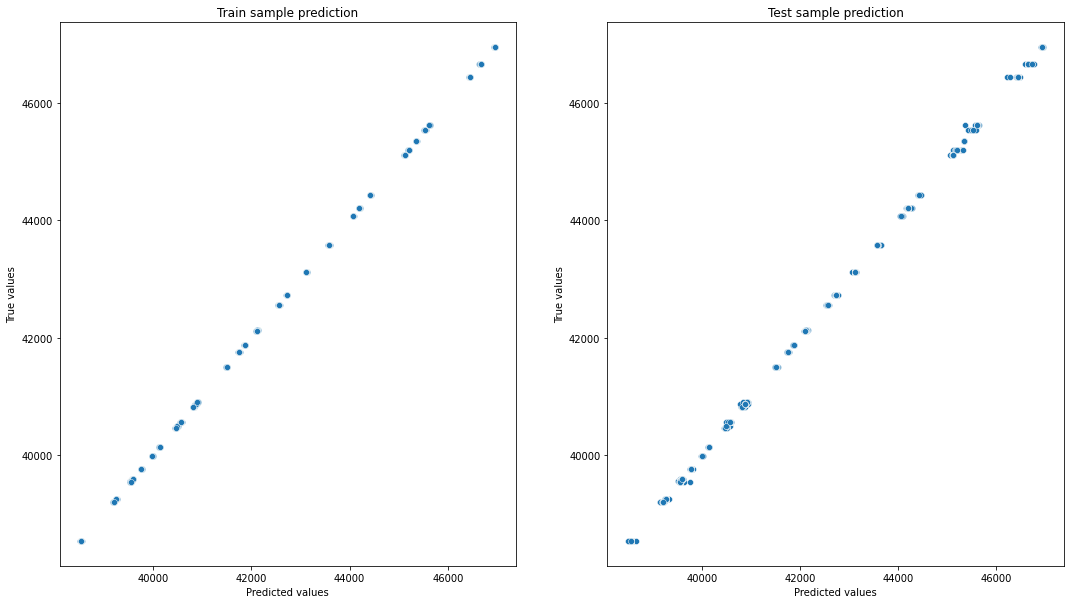

In [12]:
y_train_preds = catboost_model.predict(X_train)
y_valid_preds = catboost_model.predict(X_test)
evaluate_preds(y_train, y_train_preds, y_test, y_valid_preds)